In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv(r"https://raw.githubusercontent.com/azaz6216/dataset/refs/heads/main/gender-checkpoint.csv")

In [8]:
df.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [10]:
df.describe()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
count,66,66,66,66,66
unique,3,7,6,4,2
top,Cool,Rock,Doesn't drink,Coca Cola/Pepsi,F
freq,37,19,14,32,33


In [11]:
df.columns

Index(['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage',
       'Favorite Soft Drink', 'Gender'],
      dtype='object')

In [12]:
azaz=['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage',
       'Favorite Soft Drink', 'Gender']

In [14]:
dffinal=pd.get_dummies(df,columns=azaz,drop_first=True).astype(int)
dffinal.head()

,Favorite Color_Neutral,Favorite Color_Warm,Favorite Music Genre_Folk/Traditional,Favorite Music Genre_Hip hop,Favorite Music Genre_Jazz/Blues,Favorite Music Genre_Pop,Favorite Music Genre_R&B and soul,Favorite Music Genre_Rock,Favorite Beverage_Doesn't drink,Favorite Beverage_Other,Favorite Beverage_Vodka,Favorite Beverage_Whiskey,Favorite Beverage_Wine,Favorite Soft Drink_Coca Cola/Pepsi,Favorite Soft Drink_Fanta,Favorite Soft Drink_Other,Gender_M
0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
2,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
3,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0


In [15]:
X=dffinal.drop(['Gender_M'],axis=1)
y=dffinal['Gender_M']

In [16]:
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=10)

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
model=LogisticRegression(random_state=42)

In [68]:
model.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [69]:
predictions=model.predict(X_test)
predictions

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0])

In [70]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 

In [71]:
accuracy_score(predictions,y_test)

0.6363636363636364

In [73]:
a=confusion_matrix(predictions,y_test)
a

array([[7, 3],
       [5, 7]], dtype=int64)

<Axes: >

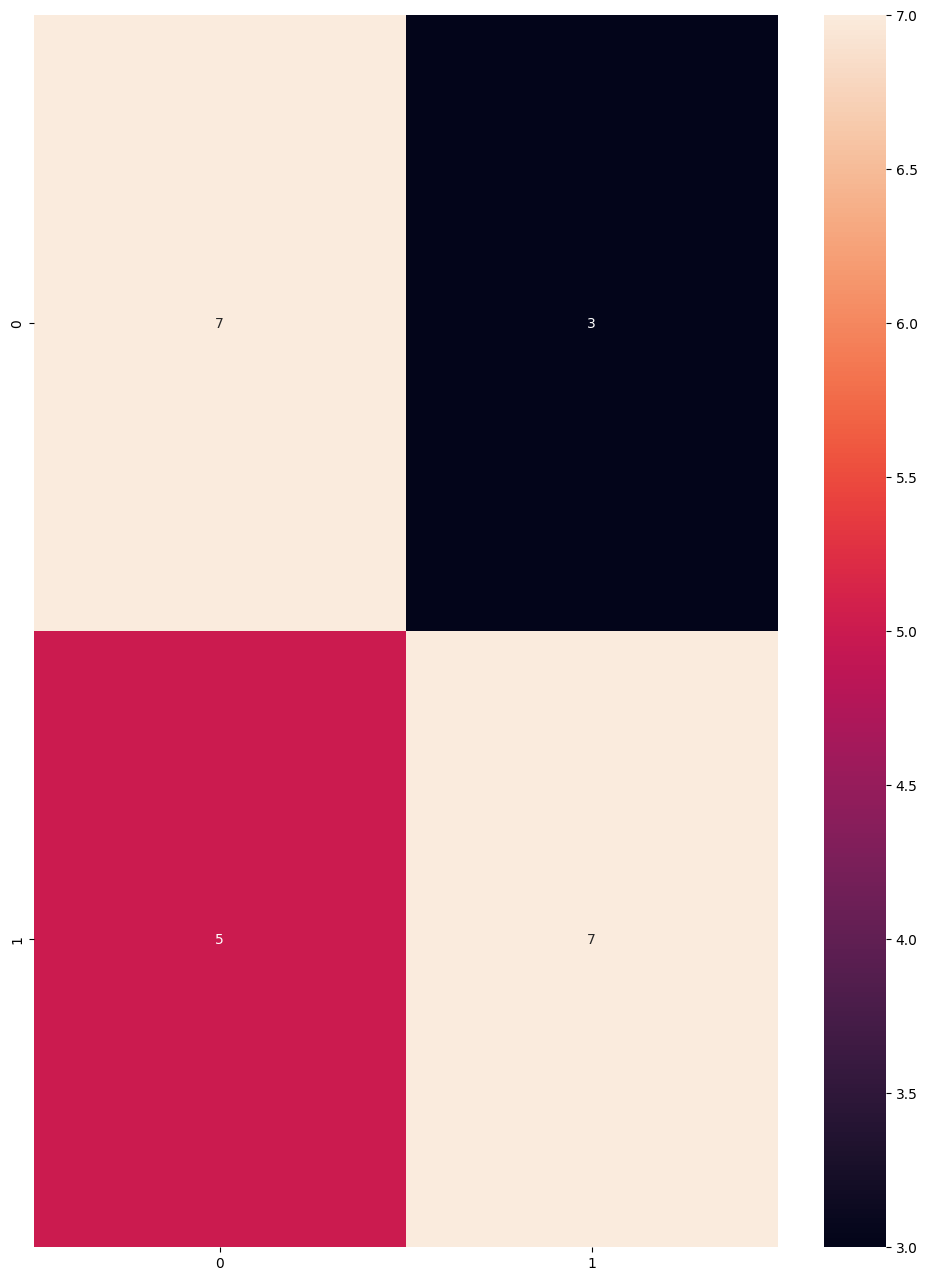

In [75]:
plt.figure(figsize=(12,16))
sns.heatmap(a,annot=True)

In [76]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.58      0.70      0.64        10
           1       0.70      0.58      0.64        12

    accuracy                           0.64        22
   macro avg       0.64      0.64      0.64        22
weighted avg       0.65      0.64      0.64        22

